# Hypothesentest: Korrelationsanalyse

In diesem Jupyter Notebook werden wir die Hypothese 2, die wir in [Modul 2](https://moodle.ki-campus.org/mod/h5pactivity/view.php?id=6593) formuliert haben, untersuchen.

Dafür werden wir alle Schritte, die Sie bereits für den Vorzeichentest kennengelernt haben durcharbeiten:


 -   Formulierung der Nullhypothese und der Alternativhypothese
 -   Teststatistik wählen
 -   Signifikanzniveau festlegen
 -   Nullverteilung der Teststatistik bestimmen
 -   Annahme und Ablehnungsbereich für die Nullhypothese bestimmen
 -   Teststatistik berechnen
 -   Das Ergebnis der Studie gemäß den Vorgaben aus 3. + 5. ermitteln.

Im Folgenden möchten wir unsere aufgestellten Hypothesen nun untersuchen und werden dazu die aufgeführten Schritte durchführen.
Versuchen Sie die Schritte nachzuvollziehen und soweit möglich auf Ihre eigenen Hypothesen anzuwenden.

---

**Bitte beachten** Sie, dass die enthaltenen Codezeilen ausgeführt werden müssen. Wir empfehlen Ihnen, alle Codezeilen vor der Ausführung auszuführen. Wählen Sie dazu im Menü "Cell" den Punkt "Run all".

## Einlesen der Daten

Um unsere Hypothesen im Folgenden zu überprüfen, starten wir zunächst mit dem Einlesen unserer Daten.

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

daten = pd.read_csv("UmweltLuftDaten.CSV", sep=';', header=0)

daten

,Stationscode,Datum,Uhrzeit,Feinstaub,Ozon,Stickstoffdioxid,Luftqualitätsindex,Temperatur-mean,Temperatur-min,Temperatur-max,Niederschlag,Schneefall,Windrichtung,Windgeschwindigkeit,Spitzenwindboe,Luftdruck,Sonnenminuten
0,DENW053,01.11.2020,01:00,13.0,45.0,9.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
1,DENW053,01.11.2020,02:00,13.0,33.0,13.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
2,DENW053,01.11.2020,03:00,13.0,28.0,13.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
3,DENW053,01.11.2020,04:00,13.0,41.0,7.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
4,DENW053,01.11.2020,05:00,13.0,46.0,7.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35039,DENW059,31.10.2021,21:00,6.0,51.0,9.0,sehr gut,13.0,9.0,17.9,11.6,0.0,172.1,17.0,78.0,1003.9,71.0
35040,DENW059,31.10.2021,22:00,6.0,59.0,7.0,sehr gut,13.0,9.0,17.9,11.6,0.0,172.1,17.0,78.0,1003.9,71.0
35041,DENW059,31.10.2021,23:00,6.0,45.0,NaN,sehr gut,13.0,9.0,17.9,11.6,0.0,172.1,17.0,78.0,1003.9,71.0
35042,DENW059,01.11.2021,24:00,6.0,39.0,9.0,sehr gut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Formulierung der Nullhypothese und der Alternativhypothese

**Hypothese 2**: "Es gibt einen Zusammenhang zwischen dem Luftdruck und der Feinstaubbelastung der Luft."

**Nullhypothese 2:** "Es gibt keinen Zusammenhang zwischen dem Luftdruck und der Feinstaubbelastung der Luft."




## Teststatistik wählen

Wie bereits beim Vorzeichentest beschreiben, ist die Teststatistik eine Kennzahl, die aus den Stichprobendaten berechnet wird, um in einem statistischen Hypothesentest eine Entscheidung zu treffen.

Unsere **Hypothese 2** ist eine ungerichtete Zusammenhangshypothese [siehe Modul 2](https://moodle.ki-campus.org/mod/h5pactivity/view.php?id=6593). Zur Berechnung der Teststatistik wird eine Korrelationsanalyse durchgeführt. Die Korrelationsanalyse ist ein statistisches Verfahren, das die Stärke und Richtung eines linearen Zusammenhangs zwischen zwei oder mehr Variablen ermittelt (siehe auch: https://datatab.de/tutorial/korrelation).

Bei der Korrelationsanalyse wird der Korrelationskoeffizient $r$ berechnet, der angibt, wie stark der Zusammenhang zwischen zwei Werten ist. In unserer Hypothese sind das die Werte für Feinstaub und Luftdruck. Der Korrelationskoeffizient $r$  kann Werte zwischen $-1$ und $+1$ annehmen. Somit ist unsere **Teststatistik** der Korrelationskoeffizient $r$.

Mit Hilfe einer Korrelationsanalyse kann  festgestellt werden, wie stark und in welche Richtung zwei Werte zusammenhängen:

+ **Positive Korrelationen** liegen vor, wenn die Zunahme der Variablen&nbsp;A auch zu einer Zunahme der Variablen&nbsp;B führt. Beispielsweise korreliert die Körpergröße positiv mit dem Gewicht. Positve Korrelationen werden am positiven Korrelationskoeffizienten&nbsp;$r$ erkannt.

+ Bei **negativen Korrelationen** führt die Zunahme der Variablen&nbsp;A zu einer Abnahme der Variablen&nbsp;B. Ein Beispiel hierfür ist die Korrelation zwischen der Kraftstoffmenge im Auto und der Länge der zurückgelegten Strecke. Negative Korrelationen werden am negativen Korrelationskoeffizienten&nbsp;$r$ erkannt.

+ Wenn der Korrelationskoeffizient nahe bei 0 liegt, besteht keine erkennbare lineare Beziehung zwischen den Variablen.

**Wert "$r$" und Stärke des Zusammenhangs**
+ 0,0 < 0,1	kein Zusammenhang
+ 0,1 < 0,3	geringer Zusammenhang
+ 0,3 < 0,5	mittlerer Zusammenhang
+ 0,5 < 0,7	hoher Zusammenhang
+ 0,7 < 1	sehr hoher Zusammenhang

siehe Kuckartz, U., Rädiker, S., Ebert, T., & Schehl, J. (2013). Statistik: eine verständliche Einführung. Wiesbaden, S. 213, URL: https://link.springer.com/book/10.1007/978-3-531-19890-3

**Vorsicht**: Die Korrelation misst die Stärke des Zusammenhangs zwischen zwei Variablen. Sie sagt jedoch nichts darüber aus, ob eine Variable die andere verursacht (Kausalität). Korrelationsanalysen sind in erster Linie ein nützliches Instrument, um erste Hinweise auf Zusammenhänge zwischen Variablen zu erhalten, bevor tiefergehende Kausalanalysen durchgeführt werden.


## Signifikanzniveau festlegen

Mit einem Hypothesentest kann die Nullhypothese nie mit 100 %iger Sicherheit verworfen oder bestätigt werden. Es besteht immer eine Irrtumswahrscheinlichkeit. Das liegt daran, dass für die Analyse immer eine Stichprobe aus der Grundgesamtheit gezogen wird. Wenn z. B. eine WählerInnenbefragung durchgeführt wird, werden nicht alle möglichen WählerInnen befragt, sondern es wird eine Stichprobe aus der Grundgesamtheit der WählerInnen gezogen, welche die Eigenschaften der WählerInnengruppe am besten repräsentiert. Eine andere Stichprobe aus der selben Grundgesamtheit könnte jedoch zu etwas anderen Ergebnissen bei der Analyse führen, insbesondere wenn die Stichprobe aus irgendeinem Grund von vornherein zu sehr von der Grundgesamtheit abweicht. Wenn die Daten auf Messergebnissen beruhen, kommen noch Messfehler dazu. Diese können einen Effekt verschleiern (Fehler 1. Art, s. u.) oder manchmal auch vortäuschen (Fehler 2. Art). Daher ist jede Aussage über eine Hypothese immer mit einer Irrtumswahrscheinlichkeit behaftet.

Die Irrtumswahrscheinlichkeit für das fehlerhafte Ablehnen der Nullhypothese wird als **Signifikanzniveau** (α) bezeichnet.
Das Signifikanzniveau wird immer vor der Analyse festgelegt. Es liegt häufig zwischen 1&#8239;% und 5&#8239;%. Bei einem Signifikanzniveau von 5&#8239;% ($α=0,05$) besteht ein Risiko von 5&#8239;%, dass die Nullhypothese verworfen wird, obwohl sie eigentlich wahr ist.

Auch für unseren Korrelationstest legen wir das Signifikanznevieau auf $α=0,05$.

Das Signifikanzniveau muss vor der Ermittlung der Teststatistik festgelegt werden. Sonst geht man wie der texanische Scharfschütze vor, der zuerst auf sein Scheunentor schießt und dann eine Zielscheibe um das Einschussloch malt.


## Nullverteilung der Teststatistik bestimmen


Da alle statistischen Test auf Wahrscheinlichkeiten und Stichproben beruhen, verwenden alle diese Tests auch eine **Nullverteilung**, die die Wahrscheinlichkeit beschreibt, mit der eine bestimmte Teststatistik auftritt, falls die Nullhypothese zutrifft (deswegen heißt sie Nullverteilung).
In der Korrelationsanalyse beschreibt die Nullverteilung die Verteilung des Korrelationskoeffizienten $r$ unter der Annahme, dass kein Zusammenhang zwischen den beiden untersuchten Variablen besteht.
Wenn die Nullhypothese stimmt, also keine Korrelation zwischen Variablen vorliegt, dann erwarten wir für $r$ einen Wert nahe Null. Werte die sich der $-1$ oder der $1$ annähern sind eher unwahrscheinlich.

Allerdings werden uns in dem Test, den wir im Folgenden durchführen, viele Arbeitsschritte bereits abgenommen, sodass wir nicht mehr anhand der Nullverteilung entscheiden müssen, ob unser $r$ Wert in den Annahme- oder Ablehungsbereich fällt.

## Annahme und Ablehnungsbereich für die Nullhypothese bestimmen

Für die Entscheidung, ob die Nullhypothese abgelehnt werden kann oder nicht, wird statt der Annahme- und Ablehnungsbereiche auch der sogenannte $p$-Wert verwendet. Er wird auch beim Test weiter unten neben den Korrelationskoeffizienten $r$ mit ausgegeben.

### Was sagt der $p$-Wert aus?

Der $p$-Wert gibt die Wahrscheinlichkeit an, mit der festgestellt werden kann, ob ein Ergebnis einer Analyse zufällig ist oder tatsächlich eine statistisch signifikante Abweichung darstellt, so dass die Nullhypothese verworfen werden kann.

Im Folgenden Video wir der $p$-Wert anschaulich erklärt: https://www.youtube.com/watch?v=NW-_u3vXJhk


**Interpretation des $p$-Werts:**

Wir nutzen den $p$-Wert gemeinsam mit dem vorher festgelegten Signifikanzniveau $a$, um zu entscheiden, ob das Ergebnis in den Annahme- oder Ablehnungsbereich der Nullhypothese fällt, wie folgt:

+ **Kleiner $p$-Wert** (z.&#8239;B. unter dem Signifikanzniveau $α = 0,05$): deutet darauf hin, dass das Ergebnis statistisch signifikant ist und die Nullhypothese möglicherweise abgelehnt werden kann. Das heißt, es ist unwahrscheinlich, dass das Ergebnis rein zufällig zustande kam. Aber Vorsicht vor dem **Fehler erster Ordnung** (siehe weiter unten)!

+ **Großer $p$-Wert** (z. B. über dem Signifikanzniveau $\alpha = 0,05)$:
deutet darauf hin, dass das Ergebnis  vermutlich zufällig entstanden ist und wir  die Nullhypothse vorerst nicht verwerfen können. Aber Vorsicht vor dem Fehler **zweiter Ordnung** (siehe weiter unten)!

Aufgrund des p-Werts wird der Effekt wie folgt interpretiert:
+ $p < 0,01$ : hoch signifikant

+ $p < 0,05$ : signifikant

+ $p  ≥ 0,05$ : nicht signifikant

### Was sagt der p-Wert **nicht** aus?

Der p-Wert entspricht **nicht** der Wahrscheinlichkeit dafür, dass der Ausgang eines Experimentes auf Zufall beruht oder dass die Teststatistik nur durch Zufall in den Ablehnungsbereich geraten ist, und nicht wegen eines tatsächlich vorhandenen Effekts.

Den p-Wert mit dieser Wahrscheinlichkeit gleichzusetzen, wäre so, als ob man zuerst den Wert der Teststatistik durch ein Experiment bestimmen würde, dann die Grenze zwischen Annahme- und Ablehnungsbereich in der Nullverteilung genau an der Stelle ziehen würde, an der die Teststatistik liegt, und schließlich das Signifikanzniveau aus der Breite des Ablehnungsbereiches ablesen würde. Das darf man aber nicht, denn der p-Wert ist auch nur eine Zufallsgröße, die von der Zusammenetzung der Stichprobe und den Messfehlern abhängt.



## Teststatistik berechnen

Für unsere Auswertung verwenden wir die Korrelationsanalyse nach Pearson. Die Korrelationsanalyse nach Pearson untersucht den linearen Zusammenhang zwischen zwei metrischen Variablen, z. B. um festzustellen, ob eine Variable steigt oder sinkt, wenn die andere steigt.

Um die Pearson-Analyse durchführen zu können, müssen folgende Voraussetzungen erfüllt sein:

1. Die Variablen sollten metrisch sein (siehe auch: [Modul2 Skalenniveaul 2](https://moodle.ki-campus.org/mod/h5pactivity/view.php?id=6612)).
2. Der Zusammenhang (die Korrelation) zwischen den Variablen sollte linear sein, was durch Streudiagramme überprüft werden kann.
3. Insbesondere bei kleinen Stichproben sollten die Daten der Variablen annähernd normalverteilt sein.

Die Voraussetzungen werden wir in den nächsten Schritten überprüfen.

### Voraussetzung 1: Art der Variablen

Unsere Variablen "Feinstaub" und "Luftdruck" liegen als metrische Daten vor.  

### Voraussetzung 2: Überprüfung einer möglichen Korrelation


Ein Streudiagramm kann auch zur ersten visuellen Abschätzung eines liniearen Zusammenhangs zwischen Feinstaub und Luftdruck verwendet werden.  

Ein Streudiagramm (auch Scatterplot genannt) ist eine grafische Darstellung, die verwendet wird, um die Beziehung zwischen zwei numerischen Variablen darzustellen. Jeder Punkt im Diagramm repräsentiert ein Datenpaar, wobei die Position entlang der x-Achse den Wert der einen Variable und die Position entlang der y-Achse den Wert der anderen Variable zeigt. Streudiagramme eignen sich besonders gut, um Zusammenhänge, Muster oder Ausreißer in den Daten zu erkennen, wie etwa positive oder negative Korrelationen zwischen den Variablen.



<Axes: xlabel='Luftdruck', ylabel='Feinstaub'>

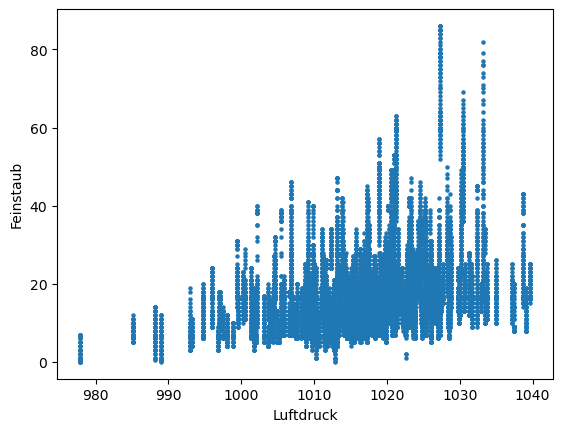

In [3]:
#Ausgabe des Scatterplots mit den Werten Luftdruck und Feinstaub
daten.plot(kind='scatter', x='Luftdruck', y='Feinstaub', marker='.')

Eine umfangreichere Darstellung eines möglichen Zusammenhangs sehen sie im Folgenden Plot.

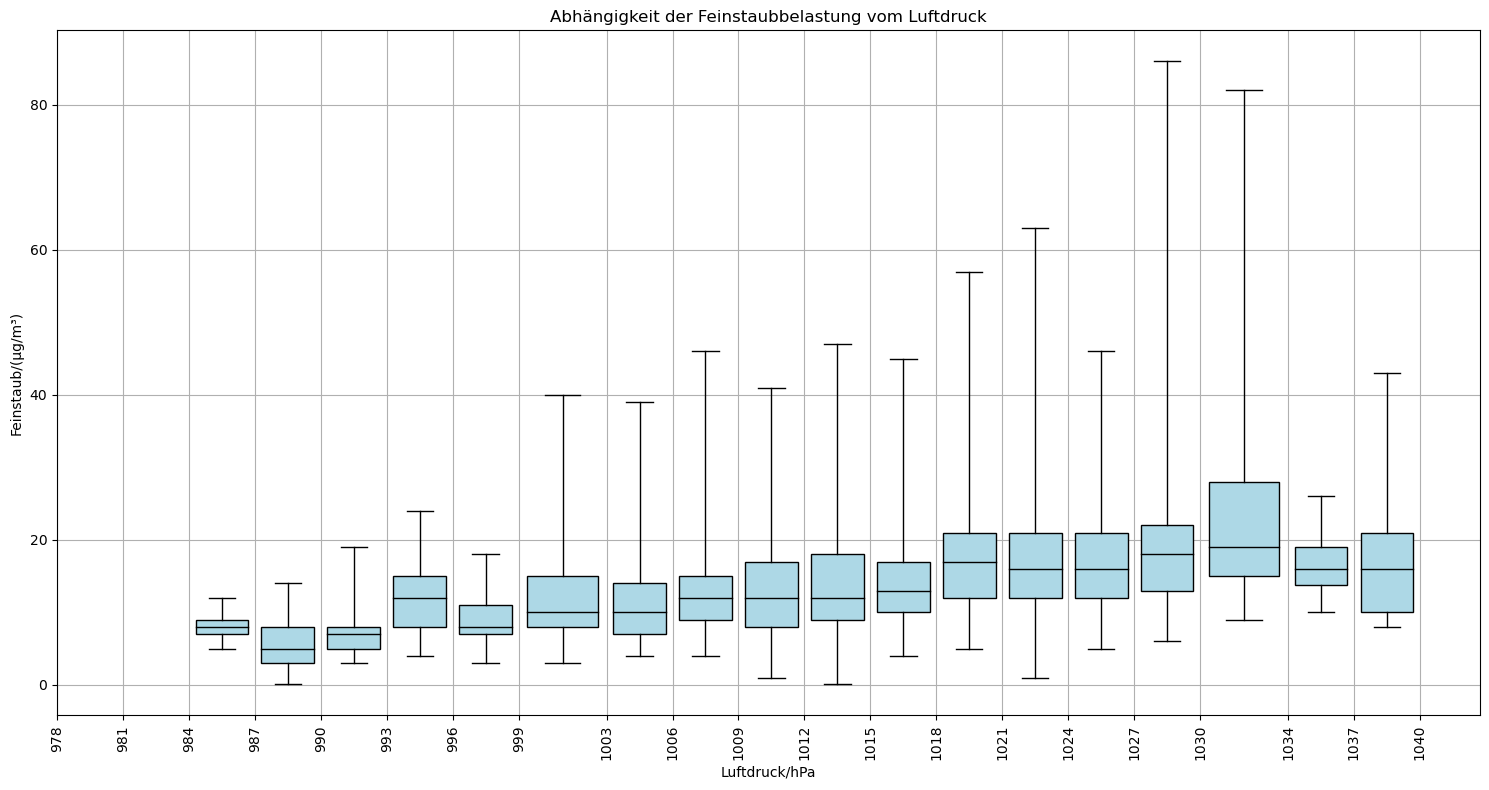

In [10]:
# Define the number of bins
n_bins = 20

# Filtering out NaN values from 'Luftdruck' and 'Feinstaub'
filtered_data = daten.dropna(subset=['Luftdruck', 'Feinstaub']).copy()

# Create Luftdruck bins
min_luftdruck = filtered_data['Luftdruck'].min()
max_luftdruck = filtered_data['Luftdruck'].max()
bins = np.linspace(min_luftdruck, max_luftdruck, n_bins + 1)

# Round the bins to the nearest integer
bins = np.round(bins).astype(int)

# Assign each Luftdruck value to a bin using .loc
filtered_data.loc[:, 'Luftdruck_bin'] = pd.cut(filtered_data['Luftdruck'], bins, include_lowest=True)

# Group the data by Luftdruck_bin and specify observed=False to retain current behavior
grouped = filtered_data.groupby('Luftdruck_bin', observed=False)['Feinstaub']

# Prepare the data for boxplot
boxplot_data = [group.tolist() for name, group in grouped]

# Create midpoints for the bins to center the boxplots
bin_edges = bins
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plotting
plt.figure(figsize=(15, 8))
bplot = plt.boxplot(boxplot_data, positions=bin_midpoints, whis=(0, 100), widths=np.diff(bin_edges) * 0.8, patch_artist=True)
for patch in bplot['boxes']:
    patch.set_facecolor("lightblue") #THK_ORANGE
for median in bplot['medians']:
    median.set(color="black")

# Adding plot details
plt.xlabel('Luftdruck/hPa')
plt.ylabel('Feinstaub/(μg/m³)')
plt.title('Abhängigkeit der Feinstaubbelastung vom Luftdruck')
plt.xticks(ticks=bin_edges, labels=[f"{int(edge)}" for edge in bin_edges], rotation=90)  # Ticks at bin edges
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

Beide Diagramme zeigen in Ansätzen, dass die Werte für den Feinstaub bei einem erhöten Luftdruck auch steigen. Der Zusammenhang scheint aber nicht immer linear zu sein. Dafür sind sogenannte Ausreißer sichtbar. Ausreißer sind Meßwerte, die stark von der gesamten Messreihe abweichen. Aber trotz der Ausreißen kann in beiden Graphiken ein leichter positiver linearer Zusammenhang zwischen Feinstaub und Luftdruck erkannt werden.

### Voraussetzung 3: Überprüfung der Normalverteilung

Viele statistische Tests setzen eine Normalverteilung der Daten voraus, da viele natürliche Phänomene (z. B. Körpergröße, Blutdruck) annähernd normalverteilt sind. Die Normalverteilung ist daher eine Wahrscheinlichkeitsverteilung, die eine Glockenkurve oder Gauß-*Kurve* beschreibt. Ihr Kurvenverlauf ist symmetrisch, wobei Modalwert, Median und arithmetischer Mittelwert identisch sind (siehe auch: [Modul 4.1](https://moodle.ki-campus.org/mod/page/view.php?id=6619)). Auch die Binomialverteilung, die Sie bereits beim Vorzeichentest kennengelernt haben, ist eine Normalverteilung (siehe auch: https://datatab.de/tutorial/test-auf-normalverteilung).

Für die Korrelationsanalyse wird insbesondere bei kleinen Stichproben eine annähernde Normalverteilung vorausgesetzt. Für unseren Test werden wir die Normalverteilung grafisch überprüfen, indem wir die Werte für Feinstaub und Luftdruck in einem Histogramm darstellen.

### Visuelle Prüfung auf Normalverteilung


Ob die Werte eines Datensatzes normalverteilt sind lässt sich auch mit statistischen Tests überprüfen. Wer sich dazu einlesen möchte findet z.B. hier eine einfache Einführung: [datatab.de](https://datatab.de/tutorial/test-auf-normalverteilung).


Da die Überprüfung anhand eines statistischen Tests den Rahmen der Veranstaltung sprengen würde, konzentrieren wir uns hier auf die visuelle Überprüfung.

Mit Hilfe eines Histogramms können wir uns einen Eindruck über die Verteilung der Daten verschaffen. Im "[Modul 4.1](https://moodle.ki-campus.org/mod/page/view.php?id=6619): Daten auswerten" Abschnitt "Schiefe, Wölbung, Exzess" haben wir Verteilungen untersucht und gesagt, dass die Schiefe einer Verteilung durch die Position von arithmetischem Mittel, Modalwert und Medianwert beschrieben werden kann. Man sagt die Verteilung ist symmetrisch, wenn gilt, dass Modus, Median und Mean der Verteilung in etwa übereinstimmen.

Wir schauen uns also zunächst die Histogramme unserer Daten an.

**Histogramm Luftdruck**

Histogramm Luftdruck


<Axes: ylabel='Frequency'>

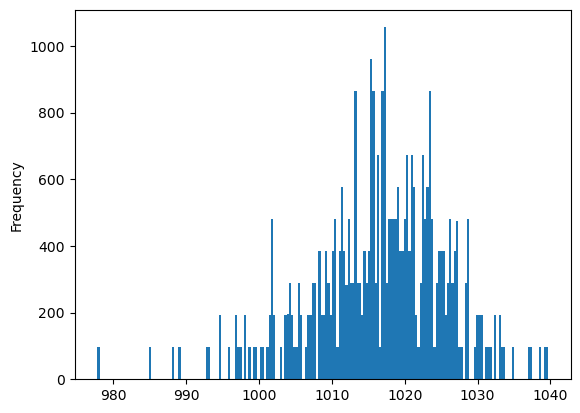

In [11]:
#Histogramm für den Luftdruck ausgeben
print("Histogramm Luftdruck")
daten['Luftdruck'].plot.hist(bins=200)

In [12]:
from statistics import mode

print("Mean: " + str(daten['Luftdruck'].mean()))
print("Median: " + str(daten['Luftdruck'].median()))
print("Modus: " + str(daten['Luftdruck'].mode()[0]))


Mean: 1016.5115652471744
Median: 1017.2
Modus: 1017.4


Die Verteilung der Luftdruckdaten scheint symmetrisch zu sein und auch die Werte für Median, Mittelwert und Modus der Daten liegen nahe beieinander. Für die Untersuchung kann hier von einer Normalverteilung der Daten ausgegangen werden.

**Histogramm Feinstaub**

<Axes: ylabel='Frequency'>

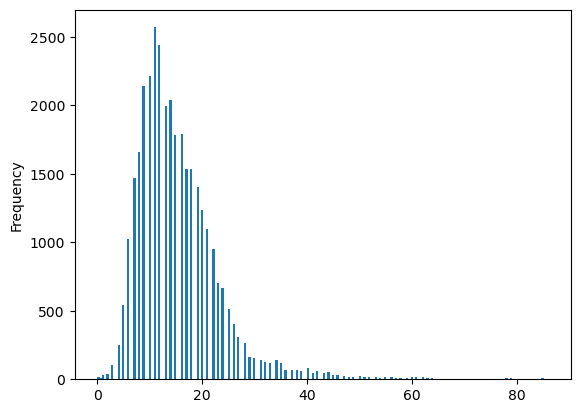

In [7]:
daten['Feinstaub'].plot.hist(bins=200)

In [13]:
print("Mean: " + str(daten['Feinstaub'].mean()))
print("Median: " + str(daten['Feinstaub'].median()))
print("Modus: " + str(daten['Feinstaub'].mode()[0]))

Mean: 15.521634268218712
Median: 14.0
Modus: 11.0


Die Daten für den Feinstaub sind leicht rechtsschief.

Wenn die Daten leicht rechtsschief sind, kann dies die Ergebnisse der Pearson-Korrelation beeinflussen, aber im Allgemeinen ist die Pearson-Korrelation relativ robust gegenüber kleinen Abweichungen von der Normalverteilung [1].

---

[1] Hauke, J., & Kossowski, T. (2011). Comparison of values of Pearson’s and Spearman’s correlation coefficients on the same sets of data. Quaestiones Geographicae, 30(2), 87-93.


## Test durchführen

Die Korrelationsanalyse nach Pearson ist im Pythen-Paket $scipy$ , die wir am Anfang dieser Datei importieren, bereits implementiert und kann einfach verwendet werden.

Die Funktion zur Korrelationsanalyse kann keine fehlenden Werte verarbeiten, deshalb entfernen wir diese mit dropna() aus der Verteilung, bevor wir die Verteilung an die Funktion $stats.pearsonr()$ übergeben.

In [17]:
from scipy import stats
#Berechnung des Korrelationskoeffizienten und des p-Wertes zwischen Feinstaub und Luftdruck
r, p_value =stats.pearsonr(daten.dropna()['Feinstaub'], daten.dropna()['Luftdruck'])
print("Das Ergebnis des Korrelationstest liefert einen Korrelationskoefizient r = " + str(r) + " mit einem p-Wert von p = " + str(p_value) )

# Resultate interpretieren und ausgeben:
alpha = 0.05
if p_value < alpha:
    print("Die Nullhypothese wird verworfen; es gibt vermutlich einen signifikanten linearen Zusammenhang zwischen Luftdruck und Feinstaubbelastung.")
else:
    print("Die Nullhypothese kann nicht verworfen werden; Es gibt vermutlich keinen signifikant linearen Zusammenhang zwischen der Luftdruck und der Feinstaubbelastung.")


Das Ergebnis des Korrelationstest liefert einen Korrelationskoefizient r = 0.3819327489354056 mit einem p-Wert von p = 0.0
Die Nullhypothese wird verworfen; es gibt vermutlich einen signifikanten linearen Zusammenhang zwischen Luftdruck und Feinstaubbelastung.


## Das Ergebnis der Studie gemäß den Vorgaben aus 3. + 5. ermitteln.

Als Ergebnis der Korrelationsanalyse erhalten wir die Werte $r=0,38$ und $p=0,0$

Der $p$-Wert kann von der Größe der Stichporbe beinflusst werden. Je größer die Stichprobe, desto kleiner der $p$-Wert. So ist er in unserer Korrelationsanalyse annährend Null, siehe auch: https://datatab.de/tutorial/test-auf-normalverteilung#Graphische).
Der liegt somit unter dem festgelegten Signifikanzniveau von $α =0,05$, was auf einen signifikanten positive linearen Zusammenhang hinweist. Die Nullhypothese kann somit vorerst verworfen werden.

## Diskussion der Ergebnisse

Trotz dieser Werte ($r=0,38$ und $p =0,0$) sollten die Ergebnisse immer kritisch betrachtet werden. Der $p$-Wert gibt nur die Wahrscheinlichkeit an, unter der die Nullhypothese verworfen werden kann. Es kann immer zu Fehlinterpretationen kommen, die in der Statistik als Fehlern erster und zweiter Ordnung bezeichnet werden.

Ein **Fehler erster Ordnung** liegt vor, wenn die Nullhypothese verworfen wird, obwohl sie in Wirklichkeit wahr ist.

Ein **Fehler zweiter Ordnung** liegt vor, wenn die Nullhypothese nicht verworfen wird, obwohl sie falsch ist. Dies bedeutet, dass ein tatsächlicher Effekt übersehen wird.

Es ist also wichtig, bei jeder Analyse abzuwägen und die Ergebnisse kritisch zu hinterfragen. Wenn wir eine größere Sicherheit erzielen wollen, sollten wir das Experiment beispielsweise mit einer anderen oder größeren Stichprobe wiederholen (dadurch nimmt die Standardabweichung ab und die Trennfähigkeit des Tests,*power* wird höher). Zudem können wir auch das Signifikanzniveau auf 1% ($a = 0,01$) senken. Damit wird es aber auch schwieriger, die Alternativhypothese zu bestätigen.